In [ ]:
import os, csv, argparse, sys
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
sys.path.append('..')
from utility import *

"""
TODO: Execture
"""
if __name__ == '__main__':
    num_data = 2000
    MAX_Iter = 5000 #20 itr/epoch
    BATCH_SIZE = 100
    
    num_func = 1
    num_model = 0
    
    exec('f = f%s' % num_func)
    exec('net = Net%s().cuda().double() ' % num_model)
    
    data_save_file_name = 'func' + str(num_func) + '_model' + str(num_model) + '_data.dat'
    loss_save_file_name = 'func' + str(num_func) + '_model' + str(num_model) + '_loss.dat'
    
    loader = UtiData.DataLoader(dataset=make_feature(num_data, f), 
                                batch_size=BATCH_SIZE, 
                                shuffle=True, num_workers=1)
    
    #criterion = nn.MSELoss().cuda()
    criterion = nn.MSELoss().cuda()
    
    #optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.005)
    optimizer = torch.optim.Adam(net.parameters(), lr=0.001, betas=(0.9, 0.999), weight_decay=0.0000)
    
    loss_total = []
    for iter in range(0,MAX_Iter):
        running_loss = 0.0
        optimizer.zero_grad()
        for step_i, (x_batch, y_batch) in enumerate(loader):
            if x_batch.size(0) != BATCH_SIZE or y_batch.size(0) != BATCH_SIZE:
                continue
            
            x_input = Variable(x_batch.type(torch.DoubleTensor).cuda())
            y_input = Variable(y_batch.type(torch.DoubleTensor).cuda())
            
            y_hat = net(x_input)
            
            loss = criterion(y_hat, y_input)
            loss.backward()
        
            optimizer.step()
            running_loss += loss.data[0]
            
        loss_total.append(running_loss/(num_data/BATCH_SIZE))
        print('Iteration %3d: loss %.10f' % (iter, running_loss/(num_data/BATCH_SIZE)))

    x_show = np.linspace(0,1,num_data) 
    y_show = f(x_show)
    yhat_test = net(Variable(torch.from_numpy(x_show).unsqueeze(1).type(torch.DoubleTensor).cuda())).data.cpu().numpy().squeeze(1)
    
    yhat_show = []
    for i in range(len(yhat_test)):
        yhat_show.append(yhat_test[i])
    
    plt.figure(1), 
    plt.plot(x_show, y_show, 'b--'), 
    plt.plot(x_show, yhat_test, 'g'), plt.grid(True)

    plt.figure(2), 
    plt.semilogy(loss_total, 'r')
    plt.xlabel('Number of iterations')
    plt.ylabel('MSE'), plt.grid(True)
    
    print('Finish running the code!')

In [40]:
#net.state_dict()
#data_df = pd.DataFrame({"x" : x_show, "y" : y_show, "yhat" : yhat_show})
#loss_df = pd.DataFrame({"loss" : loss_total})
#data_df.to_csv(data_save_file_name, index=False)
#loss_df.to_csv(loss_save_file_name, index=False)

(<matplotlib.figure.Figure at 0x7ff2184f70f0>,
 <matplotlib.legend.Legend at 0x7ff2182daeb8>)

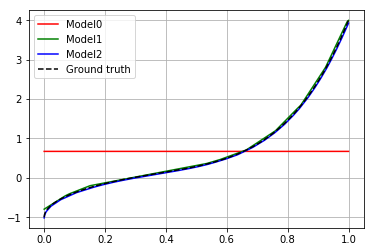

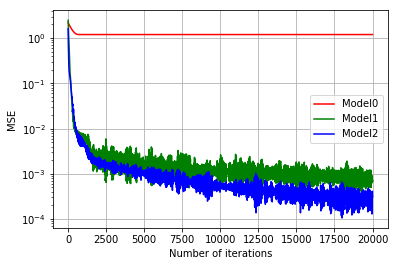

In [37]:
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

color = 'rgb'
num_func = 0
for num_model in range(3):
    data_save_file_name = 'func' + str(num_func) + '_model' + str(num_model) + '_data.dat'
    loss_save_file_name = 'func' + str(num_func) + '_model' + str(num_model) + '_loss.dat'
    data_read = pd.read_csv(data_save_file_name)
    plt.figure(1), 
    plt.plot(data_read["x"], data_read["yhat"], color[num_model], label='Model'+str(num_model)), plt.grid(True)

    loss_read = pd.read_csv(loss_save_file_name)
    plt.figure(2), 
    plt.semilogy(loss_read, color[num_model], label='Model'+str(num_model))
    plt.xlabel('Number of iterations')
    plt.ylabel('MSE')
    plt.grid(True)

plt.figure(1), plt.plot(data_read["x"], data_read["y"], 'k--', label='Ground truth'), plt.grid(True)
plt.legend(loc=0)
plt.figure(2), plt.legend(loc=0)

571


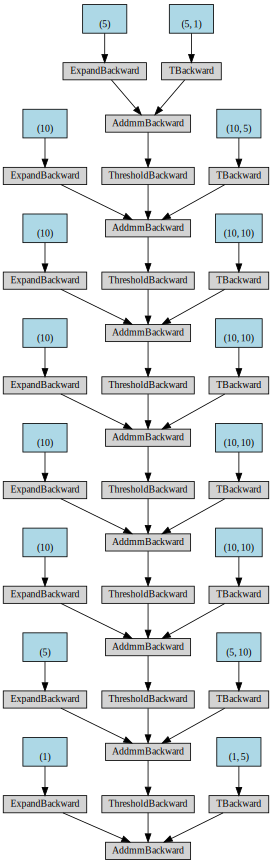

In [39]:
from torchviz import make_dot
model = nn.Sequential()
model.add_module('W0', nn.Linear(8, 16))
model.add_module('tanh', nn.Tanh())
model.add_module('W1', nn.Linear(16, 1))

x = Variable(torch.randn(1,1))

print_net = Net0()
y = print_net(x)
print(model_params(net))

make_dot(y)